In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_raw = pd.read_csv("nutritions.csv")

2a) Remove all rows that have any invalid values (NA).

In [4]:
df_a = df_raw.dropna()

2b) The five basic proximates (Ash, Fat, Protein, Water, and Carbohydrate) should always add up to 100g per food item. Remove the food entries whose five basic proximates do not sum to to 100g, with 1g tolerance on both sides. That means, if for a food entry the sum is within (99, 101), then we can keep it.

In [5]:
sum_nutrients = df_a[['Ash','Fat','Protein','Water','Carbohydrate']].sum(axis=1)
df = df_a[(sum_nutrients>=99) & (sum_nutrients<=101)]

2c) Report the number of entries that are removed at each step.

In [6]:
rem_a = len(df_raw) - len(df_a)
print("Number of entries deleted in first step: ", rem_a)
rem_b = len(df_a) - len(df)
print("Number of entries deleted in second step: ", rem_b)

Number of entries deleted in first step:  467
Number of entries deleted in second step:  152


3a)  What is the mean Carbohydrates among all food entries?

In [8]:
df['Carbohydrate'].mean()

32.91823972206137

3b) What is the mean Proteins for each group?

In [7]:
df_by_group = df.groupby('Group')
df_by_group[['Protein']].mean()

,Protein
Group,
Beef Products,24.221713
Beverages,1.856000
Breakfast Cereals,7.959321
Fast Foods,10.780041
Snacks,9.815094
Sweets,4.301043


3c) Which food has the highest Proteins for each group? What about Energy, Sugar, and Water?

In [154]:
df_by_group = df.groupby('Group')
df_by_group.apply( lambda x: df.ix[ x['Protein'].idxmax(), ['Food', 'Protein'] ] )

,Food,Protein
Group,,
Beef Products,"Beef, chuck, arm pot roast, separable lean onl...",34.72
Beverages,"Cocoa mix, with aspartame, low calorie, powder...",25.10
Breakfast Cereals,"Cereals ready-to-eat, KELLOGG'S, SPECIAL K Pro...",33.70
Fast Foods,"Fast Foods, Fried Chicken, Wing, meat only, sk...",28.49
Snacks,"Snacks, pork skins, plain",61.30
Sweets,"Gelatins, dry powder, unsweetened",85.60


In [157]:
df_by_group.apply( lambda x: df.ix[ x['Energy'].idxmax(), ['Food', 'Energy'] ] )

,Food,Energy
Group,,
Beef Products,"Beef, variety meats and by-products, suet, raw",854
Beverages,"Coffee, dry, powder, with whitener, reduced ca...",509
Breakfast Cereals,"Cereals ready-to-eat, granola, homemade",489
Fast Foods,"McDONALD'S, McDONALDLAND Chocolate Chip Cookies",480
Snacks,"Snacks, popcorn, oil-popped, microwave, regula...",583
Sweets,"Chocolate, dark, 70-85% cacao solids",598


In [160]:
df_by_group.apply( lambda x: df.ix[ x['Sugars'].idxmax(), ['Food', 'Sugars'] ])

,Food,Sugars
Group,,
Beef Products,"Beef, grass-fed, strip steaks, lean only, raw",0.00
Beverages,"Whiskey sour mix, powder",97.30
Breakfast Cereals,"Cereals ready-to-eat, KELLOGG, KELLOGG'S HONEY...",56.20
Fast Foods,"McDONALD'S, Sweet 'N Sour Sauce",35.79
Snacks,"Snacks, candy bits, yogurt covered with vitamin C",65.00
Sweets,"Sugars, granulated",99.80


In [162]:
df_by_group.apply( lambda x: df.ix[ x['Water'].idxmax(), ['Food','Water'] ] )

,Food,Water
Group,,
Beef Products,"Beef, variety meats and by-products, tripe, raw",84.16
Beverages,"Water, bottled, generic",99.98
Breakfast Cereals,"Cereals, Malt-o-Meal, plain, prepared with wat...",89.51
Fast Foods,"McDONALD'S, Side Salad",93.93
Snacks,"Snacks, beef jerky, chopped and formed",23.36
Sweets,"Pectin, liquid",96.90


3d) Which group has the highest mean Energy?

In [50]:
mean_energy_by_group = df.groupby('Group')[['Energy']].mean()
mean_energy_by_group.ix[mean_energy_by_group.idxmax()]

,Energy
Group,
Snacks,445.735849


3e) Create a histogram showing the distribution of Fat for Fast Foods.

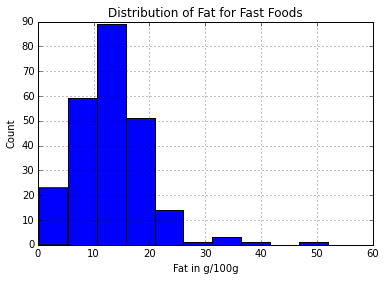

In [63]:
df_fast_food = df[(df['Group']=='Fast Foods')]
_ = df_fast_food[['Fat']].hist()
plt.title("Distribution of Fat for Fast Foods")
plt.xlabel("Fat in g/100g")
plt.ylabel("Count")

3f) Create a boxplot to compare the distributions of all nutritions for Fast Foods. 

C:\Users\Karthik\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


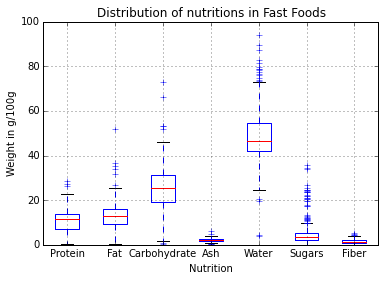

In [74]:
_ = df_fast_food[['Protein','Fat','Carbohydrate','Ash','Water','Sugars','Fiber']].boxplot()
plt.title("Distribution of nutritions in Fast Foods")
plt.xlabel('Nutrition')
_ = plt.ylabel('Weight in g/100g')

3g) Create a boxplot to compare the distribution of Energy for Fast Foods vs. the distribution of Energy for Sweets.

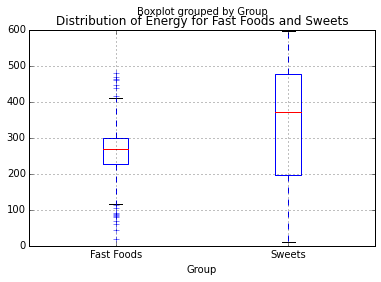

In [99]:
df_ff_sweets = df[(df['Group']=='Fast Foods') | (df['Group']=='Sweets')]
_ = df_ff_sweets.boxplot(column='Energy', by='Group')
_ =plt.title('Distribution of Energy for Fast Foods and Sweets')
_ = plt.xlabel('Group')

3h) Perform a two-sided t-test for the null hypothesis that the Energy for Fast Foods and the Energy for Sweets have identical average values. Explain what the result means.

In [107]:
energy_ff = df.ix[df['Group']=='Fast Foods', 'Energy']
energy_sw = df.ix[df['Group']=='Sweets', 'Energy']
from scipy.stats import ttest_ind
ttest_ind(energy_ff, energy_sw, equal_var=False)

Ttest_indResult(statistic=-7.4678123092477389, pvalue=4.9755056199471084e-13)

4a) What is the Pearson's correlation between Energy and Carbohydrate among all food entries?

In [163]:
df['Energy'].corr(df['Carbohydrate'])

0.68082778264254173

4b) Generate the correlation matrix between Energy, Carbohydrate, Fat, Protein, Ash, and Water.

In [173]:
corr_matrix = df[['Energy', 'Carbohydrate', 'Fat', 'Protein', 'Ash', 'Water']].corr()

4c) Visualize the correlation matrix.

C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


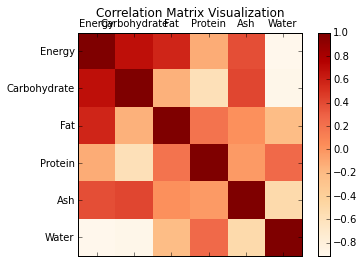

In [178]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, cmap=plt.cm.OrRd)
_ = fig.colorbar(cax)

tags = [' '] + corr_matrix.columns.tolist()
ax.set_xticklabels(tags)
ax.set_yticklabels(tags)
_ =plt.title('Correlation Matrix Visualization')

4d) Build a simple regression model of Energy from Fat, using entries in Fast Foods only. This means Energy is the dependent variable (Y), and Fat is the independent variable (X). Report coefficients, R-squared score, and the confidence intervals of the coefficients.

In [181]:
import statsmodels.formula.api as smf
df_ff = df.ix[ df.Group=='Fast Foods' ]
model1 = smf.ols('Energy ~ Fat', data=df_ff).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Energy   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     559.8
Date:                Wed, 14 Oct 2015   Prob (F-statistic):           1.13e-64
Time:                        01:11:02   Log-Likelihood:                -1239.8
No. Observations:                 242   AIC:                             2484.
Df Residuals:                     240   BIC:                             2490.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    134.6526      5.934     22.692      0.000       122.963   146.342
Fat            9.5708      0.404     23.661      0.000         8.774    10.368
==============================================================================
Omnibus:                       31.267   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.528
Skew:                          -0.540   Prob(JB):                     1.62e-19
Kurtosis:                       5.723   Cond. No.                         33.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Coefficients:
    * Intercept = 134.66
    * Slope = 9.57
* R-squared score: 0.700
* Confidence intervals:
    * Intercept: [122.96, 146.34]
    * Slope: [8.77, 10.37]